In [2]:
from models_kan import create_model
import torch.optim as optim
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from engine import train_one_epoch, evaluate

KAN_model = create_model(
    model_name='deit_tiny_patch16_224_KAN',
    pretrained=False,
    hdim_kan=192,
    num_classes=100,
    drop_rate=0.0,
    drop_path_rate=0.05,
    img_size=32,
    batch_size=144
)

# dataset CIFAR10

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((32, 32)),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                         download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=144,
                                          shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR100(
    root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=144, shuffle=False, num_workers=2)

# optimizer
optimizer = optim.SGD(KAN_model.parameters(), lr=0.001, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
KAN_model.to(device)

# train using engine.py

losses = []

for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = KAN_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

# evaluate
test_stats = evaluate(testloader, KAN_model, device=device)
print(
    f"Accuracy of the network on the {len(testset)} test images: {test_stats['acc1']:.1f}%")

print('Finished Training')

{'hdim_kan': 192, 'num_classes': 100, 'drop_rate': 0.0, 'drop_path_rate': 0.05, 'img_size': 32, 'batch_size': 144}
Files already downloaded and verified
Files already downloaded and verified


d:\Docs\GitHub\Vision-KAN\engine.py:97: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
C:\Users\idirt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\amp\autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Test:  [ 0/70]  eta: 0:04:53  loss: 4.4032 (4.4032)  acc1: 4.8611 (4.8611)  acc5: 19.4444 (19.4444)  time: 4.1986  data: 4.1015
Test:  [10/70]  eta: 0:00:28  loss: 4.4518 (4.4596)  acc1: 3.4722 (2.9040)  acc5: 13.8889 (13.5732)  time: 0.4717  data: 0.3730
Test:  [20/70]  eta: 0:00:14  loss: 4.4523 (4.4609)  acc1: 2.7778 (2.8439)  acc5: 13.1944 (12.8968)  time: 0.0977  data: 0.0001
Test:  [30/70]  eta: 0:00:09  loss: 4.4632 (4.4604)  acc1: 3.4722 (3.2258)  acc5: 12.5000 (13.1048)  time: 0.0963  data: 0.0001
Test:  [40/70]  eta: 0:00:05  loss: 4.4632 (4.4597)  acc1: 3.4722 (3.2351)  acc5: 13.8889 (13.3977)  time: 0.0965  data: 0.0002
Test:  [50/70]  eta: 0:00:03  loss: 4.4609 (4.4608)  acc1: 3.4722 (3.3769)  acc5: 13.1944 (13.2898)  time: 0.0976  data: 0.0001
Test:  [60/70]  eta: 0:00:01  loss: 4.4743 (4.4630)  acc1: 2.7778 (3.2673)  acc5: 13.1944 (13.2855)  time: 0.0973  data: 0.0003
Test:  [69/70]  eta: 0:00:00  loss: 4.4766 (4.4631)  acc1: 2.7778 (3.2900)  acc5: 13.1944 (13.4500)  tim

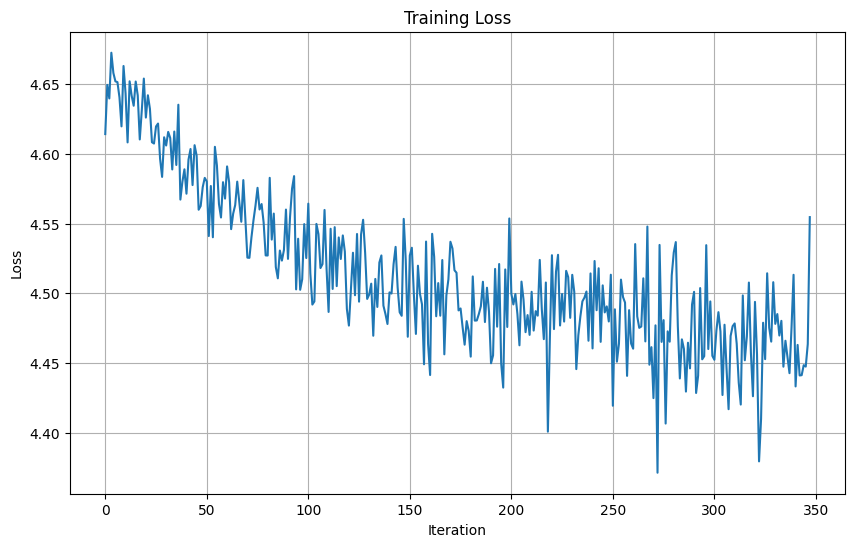

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

In [ ]:
# lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs']
# lib = SYMBOLIC_LIB.keys()
# model.auto_symbolic(lib=lib)